# Generative AI
Generative AI has been described as one of the most promising advances in AI in the past decade by the MIT Technology Review.

Generative AI opens the door to an entire world of creative possibilities with practical applications emerging across industries, from turning sketches into images for accelerated product development, to improving computer-aided design of complex objects.

For example, Glidewell Dental is training a generative adversarial network adept at constructing detailed 3D models from images. One network generates images and the second inspects those images. This results in an image that has even more anatomical detail than the original teeth they are replacing.

**`Generative AI enables computers to learn the underlying pattern associated with a provided input (image, music, or text), and then they can use that input to generate new content. Examples of Generative AI techniques include Generative Adversarial Networks (GANs), Variational Autoencoders, and Transformers.`**

## What are GANs?

GANs, a generative AI technique, pit 2 networks against each other to generate new content. The algorithm consists of two competing networks: a generator and a discriminator.

A **generator** `is a convolutional neural network (CNN)` that learns to create new data resembling the source data it was trained on.

The **discriminator** `is another convolutional neural network (CNN)` that is trained to differentiate between real and synthetic data.

The generator and the discriminator are trained in alternating cycles such that the generator learns to produce more and more realistic data while the discriminator iteratively gets better at learning to differentiate real data from the newly created data.

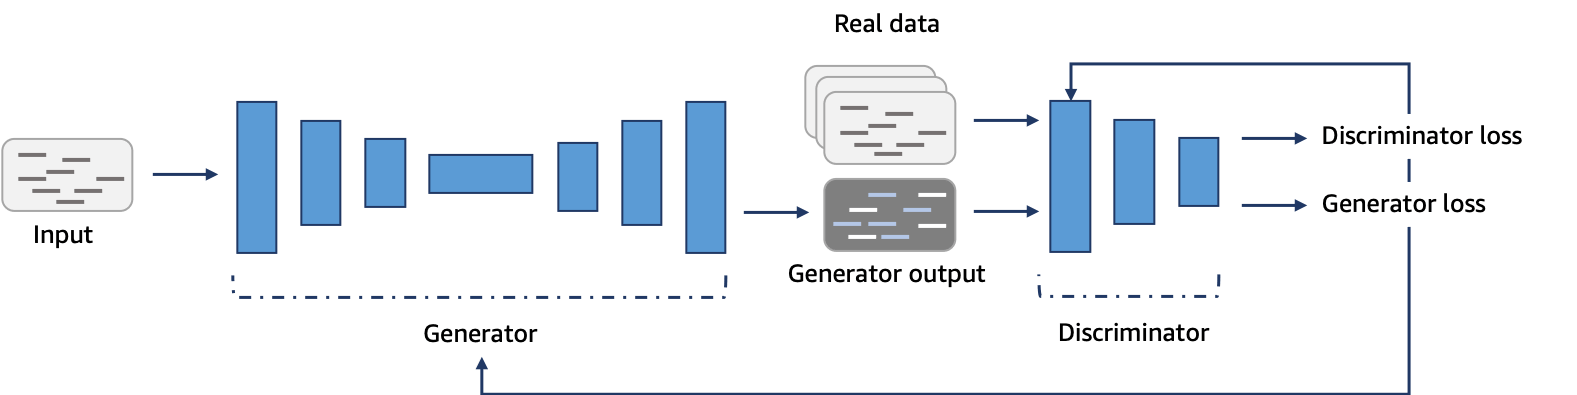

In [1]:
from IPython.display import Image
Image(filename='aws-deepcomoserr-gan-schema.png')

## Like the collaboration between an orchestra and its conductor
The best way we’ve found to explain this is to use the metaphor of an orchestra and conductor. An orchestra doesn’t create amazing music the first time they get together. They have a conductor who both judges their output, and coaches them to improve. So an orchestra, trains, practices, and tries to generate polished music, and then the conductor works with them, as both judge and coach.

The conductor is `both judging the quality of the output (were the right notes played with the right tempo) and at the same time providing feedback `and coaching to the orchestra (“strings, more volume! Horns, softer in this part! Everyone, with feeling!”). Specifically to achieve a style that the conductor knows about. So, the more they work together the better the orchestra can perform.

The Generative AI that AWS DeepComposer teaches developers about uses a similar concept. We have two machine learning models that work together in order to learn how to generate musical compositions in distinctive styles.

### Training a machine learning model using a dataset of Bach compositions
AWS DeepComposer uses GANs to create realistic accompaniment tracks. When you provide an input melody, such as twinkle-twinkle little star, using the keyboard U-Net will add three additional piano accompaniment tracks to create a new musical composition.

The U-Net architecture uses a publicly available dataset of Bach’s compositions for training the GAN. In AWS DeepComposer, the generator network learns to produce realistic Bach-syle music while the` discriminator uses real Bach music to differentiate between real music compositions and newly created ones`

## How U-Net based model interprets music
Music is written out as a sequence of human readable notes. Experts have not yet discovered a way to translate the human readable format in such a way that computers can understand it. Modern GAN-based models instead treat music as a series of images, and can therefore leverage existing techniques within the computer vision domain.

In AWS DeepComposer, we `represent music as a two-dimensional matrix (also referred to as a piano roll) with “time” ``on the horizontal axis and “pitch” on the vertical axis. `You might notice this representation looks similar to an image. A one or zero in any particular cell in this grid indicates if a note was played or not at that time for that pitch.



# Model Architecture


## Generator
The generator network used in AWS DeepComposer is adapted from the` U-Net architecture, a popular convolutional neural network `that is used extensively in the computer vision domain. The network `consists of an “encoder” that maps the single track music data (represented as piano roll images) to a relatively lower dimensional “latent space“ and a ”decoder“ that maps the latent space back to multi-track music data.`

Here are the inputs provided to the generator:

* Single-track piano roll: A single melody track is provided as the input to the generator.
* Noise vector: A latent noise vector is also passed in as an input and this is responsible for ensuring that there is a flavor to each output generated by the generator, even when the same input is provided.

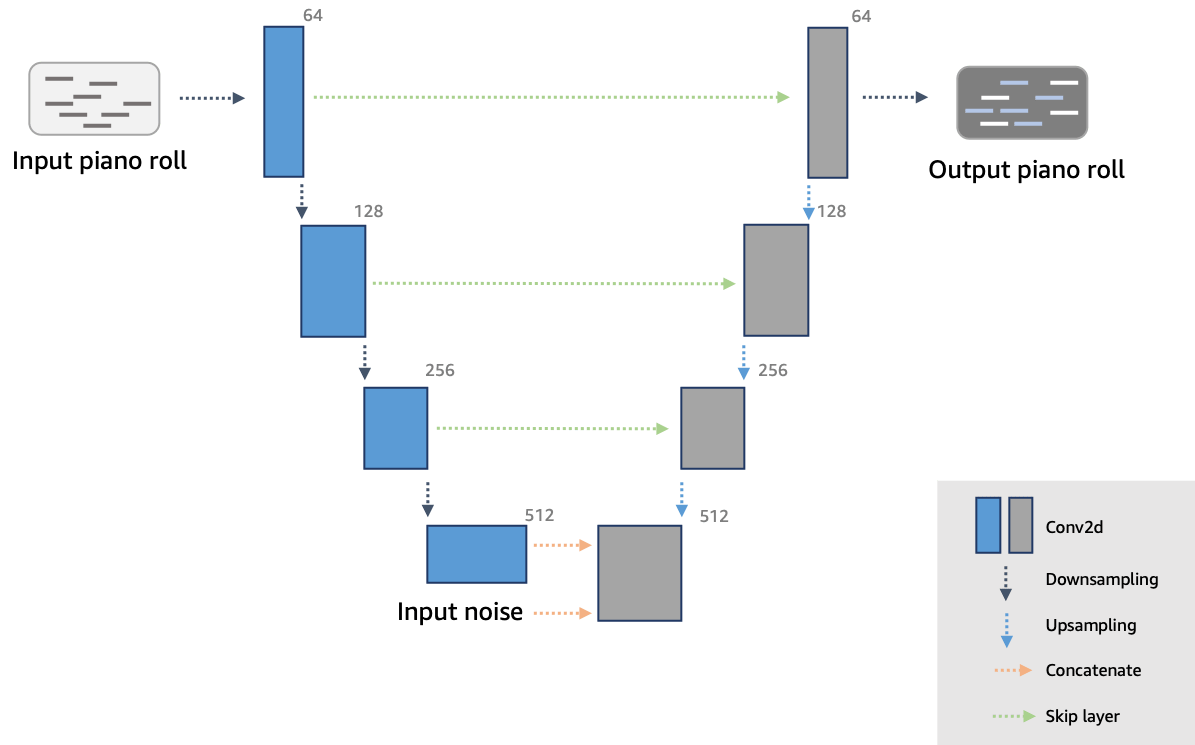

In [2]:
Image(filename='u-net.png')

## Discriminator

The `goal of the discriminator is to provide feedback to the generator` about how realistic the generated piano rolls are, so that the generator can learn to produce more realistic data. The `discriminator provides this feedback by outputting a scalar value that represents how “real” or “fake” a piano roll is.`

Since the discriminator tries to classify data as “real” or “fake”, it is not very different from commonly used binary classifiers. We use a simple architecture for the critic, composed of four convolutional layers and a dense layer at the end.

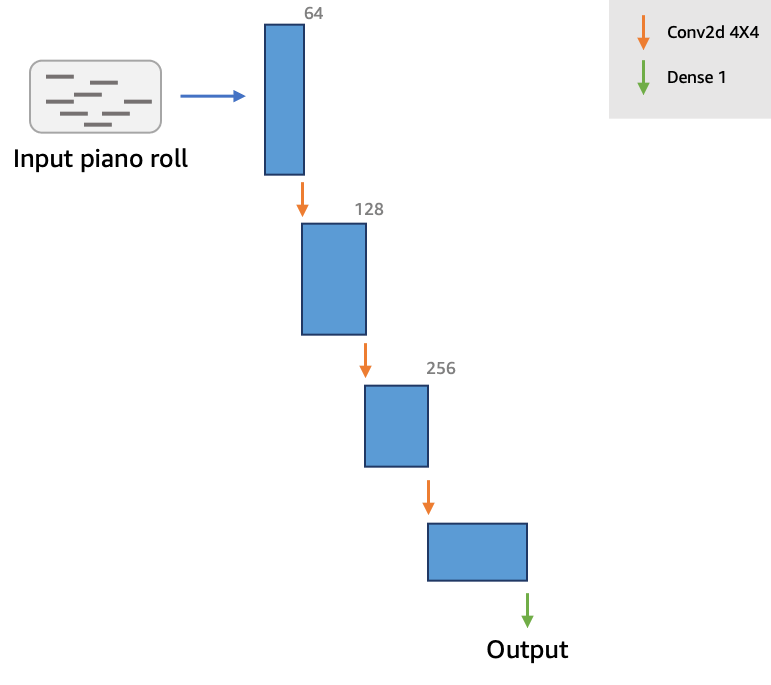

In [4]:
Image(filename='discriminator.png')

**Order the steps in U-Net architecture**
1. Input
2. Encoder
3. Latent space
4. Decoder
5. Output

# Training Methodology


During training, the generator and discriminator work in a tight loop as following:

### Generator
The generator takes in a batch of single-track piano rolls (melody) as the input and generates a batch of multi-track piano rolls as the output by adding accompaniments to each of the input music tracks.
The discriminator then takes these generated music tracks and predicts how far it deviates from the real data present in your training dataset.
### Discriminator
This feedback from the discriminator is used by the generator to update its weights. As the generator gets better at creating music accompaniments, it begins fooling the discriminator. So, the discriminator needs to be retrained as well.
Beginning with the discriminator on the first iteration, we alternate between training these two networks until we reach some stop condition (ex: the algorithm has seen the entire dataset a certain number of times).

### Finer control of AWS DeepComposer with hyperparameters
As you explore training your own custom model in the AWS DeepComposer console, you will notice you have access to several hyperparameters for finer control of this process. Here are a few details on each to help guide your exploration.

### Number of epochs
When the training loop has passed through the entire training dataset once, we call that one epoch. Training for a higher number of epochs will mean your model will take longer to complete its training task, but it may produce better output if it has not yet converged. You will learn how to determine when a model has completed most of its training in the next section.

**Training over more epochs will take longer but can lead to a better sounding musical output**.
Model training is a trade-off between the number of epochs (i.e. time) and the quality of sample output.

## Learning Rate
The learning rate controls how rapidly the weights and biases of each network are updated during training. A higher learning rate might allow the network to explore a wider set of model weights, but might pass over more optimal weights.

## Update ratio
`A ratio of the number of times the discriminator is updated per generator training epoch.` Updating the discriminator multiple times per generator training epoch is useful because it can improve the discriminators accuracy. Changing this ratio might allow the generator to learn more quickly early-on, but will increase the overall training time.

While we provide sensible defaults for these hyperparameters in the AWS DeepComposer console, you are encouraged to explore other settings to see how each changes your model’s performance and time required to finish training your model.

# Evaluation


Typically when training any sort of model, it is a `standard practice to monitor the value of the loss function throughout the duration of the training`. The `discriminator loss has been found to correlate well with sample quality.` You should expect the discriminator loss to converge to zero and the generator loss to converge to some number which need not be zero. `When the loss function plateaus, it is an indicator that the model is no longer learning`. At this point, you can stop training the model. You can view these loss function graphs in the AWS DeepComposer console.

**Sample output quality improves with more training**
After 400 epochs of training, discriminator loss approaches near zero and the generator converges to a steady-state value. `Loss is useful as an evaluation metric since the model will not improve as much or stop improving entirely when the loss plateaus`.


While standard mechanisms exist for evaluating the accuracy of more traditional models like classification or regression, `evaluating generative models is an active area of research`. 

If our model produces music which is close to the mean value of these measurements for our training dataset, our music should match the general “shape”. You’ll see graphs of these measurements within the AWS DeepComposer console

Here are a few such measurements:

* Empty bar rate: The ratio of empty bars to total number of bars.
* Number of pitches used: A metric that captures the distribution and position of pitches.
* In Scale Ratio: Ratio of the number of notes that are in the key of C, which is a common key found in music, to the total number of notes.

# Inference

Once this model is trained, the generator network alone can be run to generate new accompaniments for a given input melody. If you recall, the model took as input a single-track piano roll representing melody and a noise vector to help generate varied output.

The final process for music generation then is as follows:

* Transform single-track music input into piano roll format.
* Create a series of random numbers to represent the random noise vector.
* Pass these as input to our trained generator model, producing a series of output piano rolls. Each output piano roll represents some instrument in the composition.
* Transform the series of piano rolls back into a common music format (MIDI), assigning an instrument for each track.

## Explore Generative AI Further
[Create compositions using sample models in music studio](https://console.aws.amazon.com/deepcomposer/home?region=us-east-1#musicStudio)

[Inspect the training of existing sample models](https://console.aws.amazon.com/deepcomposer/home?region=us-east-1#modelList)

[Train your own model within the AWS DeepComposer console](https://console.aws.amazon.com/deepcomposer/home?region=us-east-1#trainModel)

[Build your own GAN model](https://github.com/aws-samples/aws-deepcomposer-samples)